In [1]:
!nvidia-smi

Sun Oct 19 14:52:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.2 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import glob
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
rf = Roboflow(api_key="7KdF37bbJKG1iIBxJWVU")
project = rf.workspace("myspace-k1yt8").project("bird-species-cpvzs")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bird-Species-1 in folder:: 100%|██████████| 373/373 [00:00<00:00, 7707.27it/s]


In [5]:
model = YOLO("yolov8n-cls.pt")
data_path = dataset.location
model.train(
    data=data_path,
    epochs=50,
    imgsz=224,
    batch=16
)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Bird-Species-1, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4e726c8770>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.5073887872328592, 'inference': 1.1897297446807897, 'loss': 0.00039487234066945483, 'postprocess': 0.0005864468073710629}
task: 'classify'
top1: 1.0
top5: 1.0


image 1/1 /content/Bird-Species-1/test/BarnOwl/9TDQ3RJ69RGC_jpg.rf.0ab8bb59e6a7211736e3c74f1346e822.jpg: 224x224 BarnOwl 1.00, FireFinch 0.00, GoldenFinch 0.00, 3.9ms
Speed: 5.6ms preprocess, 3.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict7
Image: /content/Bird-Species-1/test/BarnOwl/9TDQ3RJ69RGC_jpg.rf.0ab8bb59e6a7211736e3c74f1346e822.jpg
Predicted Class Index: 0
Predicted Class Name: BarnOwl
----------------------------------------


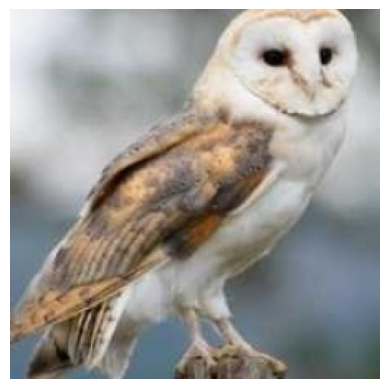


image 1/1 /content/Bird-Species-1/test/FireFinch/4PYBTHDFWZDW_jpg.rf.7f97354d28787bb6eda1da52cb03a074.jpg: 224x224 FireFinch 1.00, BarnOwl 0.00, GoldenFinch 0.00, 5.0ms
Speed: 8.7ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict7
Image: /content/Bird-Species-1/test/FireFinch/4PYBTHDFWZDW_jpg.rf.7f97354d28787bb6eda1da52cb03a074.jpg
Predicted Class Index: 1
Predicted Class Name: FireFinch
----------------------------------------


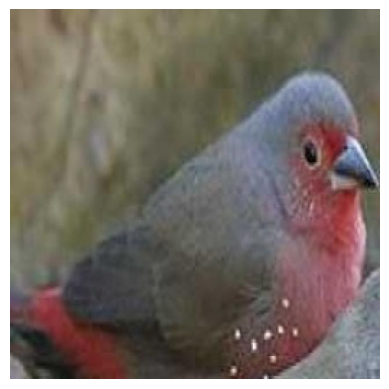


image 1/1 /content/Bird-Species-1/test/GoldenFinch/6PU73XJ1I1PP_jpg.rf.2191dc3df3a2ff859b66f7d537a3c80f.jpg: 224x224 GoldenFinch 1.00, BarnOwl 0.00, FireFinch 0.00, 5.4ms
Speed: 9.0ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict7
Image: /content/Bird-Species-1/test/GoldenFinch/6PU73XJ1I1PP_jpg.rf.2191dc3df3a2ff859b66f7d537a3c80f.jpg
Predicted Class Index: 2
Predicted Class Name: GoldenFinch
----------------------------------------


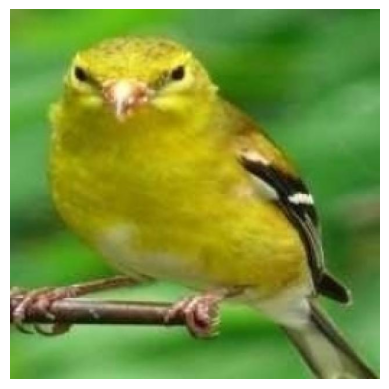

In [13]:
best_model = YOLO("runs/classify/train/weights/best.pt")

test_images = glob.glob(os.path.join(data_path, "test", "*", "*.jpg"))
for img in test_images[:35:10]:
    results = best_model.predict(img, save=True)
    print("Image:", img)
    print("Predicted Class Index:", results[0].probs.top1)
    print("Predicted Class Name:", results[0].names[results[0].probs.top1])
    print("-" * 40)
    img_bgr = cv2.imread(img)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()